In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [44]:
#wczytanie danych z pliku csv
df = pd.read_csv('data.csv', sep=';', encoding='latin-1') 
df.head()

checking_status duration                  credit_history  \
0              <0        6  critical/other existing credit   
1        0<=X<200       48                   existing paid   
2     no checking       12  critical/other existing credit   
3              <0       42                   existing paid   
4              <0       24              delayed previously   

               purpose credit_amount    savings_status employment  \
0             radio/tv          1169  no known savings        >=7   
1             radio/tv          5951              <100     1<=X<4   
2            education          2096              <100     4<=X<7   
3  furniture/equipment          7882              <100     4<=X<7   
4              new car          4870              <100     1<=X<4   

  installment_commitment     personal_status other_parties  ...  \
0                      4         male single          none  ...   
1                      2  female div/dep/mar          none  ...   
2                      2         male single          none  ...   
3                      2         male single     guarantor  ...   
4                      3         male single          none  ...   

  property_magnitude age other_payment_plans   housing existing_credits  \
0        real estate  67                none       own                2   
1        real estate  22                none       own                1   
2        real estate  49                none       own                1   
3     life insurance  45                none  for free                1   
4  no known property  53                none  for free                2   

                  job num_dependents own_telephone foreign_worker class  
0             skilled              1           yes            yes  good  
1             skilled              1          none            yes   bad  
2  unskilled resident              2          none            yes  good  
3             skilled              2          none            yes  good  
4             skilled              2          none            yes   bad  

[5 rows x 21 columns]

In [45]:
df.shape

(2003, 21)

In [46]:
df.info

<bound method DataFrame.info of                                        checking_status duration  \
0                                                   <0        6   
1                                             0<=X<200       48   
2                                          no checking       12   
3                                                   <0       42   
4                                                   <0       24   
...                                                ...      ...   
1998                                                <0       30   
1999                                       no checking       12   
2000                                                <0       45   
2001                                          0<=X<200       45   
2002  >>>>>>> 28ea5ad620799054695d64e3963c210d2d9d6421      NaN   

                      credit_history              purpose credit_amount  \
0     critical/other existing credit             radio/tv          1169   
1            

In [47]:
df.duplicated() #Zwraca wartość logiczną oznaczająca zduplikowane wiersze.

0       False
1       False
2       False
3       False
4       False
        ...  
1998     True
1999     True
2000     True
2001     True
2002    False
Length: 2003, dtype: bool

In [48]:
kredyt=df

In [49]:
kredyt.dropna(axis=0, inplace = True)#usunięcie pustych wierszy

In [50]:
kredyt.shape

(2001, 21)

In [51]:
kredyt[kredyt['class'].isin(['class'])] #odszukanie rzędu z powtórzonymi nagłówkani
kredyt.drop(kredyt[kredyt['class'] == 'class'].index, inplace = True) #usunięcie wiersza ze zdublowanymi nagłówkami
kredyt.drop_duplicates(inplace=True) #usunięcie duplikatów
kredyt

checking_status duration                  credit_history  \
0                <0        6  critical/other existing credit   
1          0<=X<200       48                   existing paid   
2       no checking       12  critical/other existing credit   
3                <0       42                   existing paid   
4                <0       24              delayed previously   
..              ...      ...                             ...   
995     no checking       12                   existing paid   
996              <0       30                   existing paid   
997     no checking       12                   existing paid   
998              <0       45                   existing paid   
999        0<=X<200       45  critical/other existing credit   

                 purpose credit_amount    savings_status  employment  \
0               radio/tv          1169  no known savings         >=7   
1               radio/tv          5951              <100      1<=X<4   
2              education          2096              <100      4<=X<7   
3    furniture/equipment          7882              <100      4<=X<7   
4                new car          4870              <100      1<=X<4   
..                   ...           ...               ...         ...   
995  furniture/equipment          1736              <100      4<=X<7   
996             used car          3857              <100      1<=X<4   
997             radio/tv           804              <100         >=7   
998             radio/tv          1845              <100      1<=X<4   
999             used car          4576        100<=X<500  unemployed   

    installment_commitment     personal_status other_parties  ...  \
0                        4         male single          none  ...   
1                        2  female div/dep/mar          none  ...   
2                        2         male single          none  ...   
3                        2         male single     guarantor  ...   
4                        3         male single          none  ...   
..                     ...                 ...           ...  ...   
995                      3  female div/dep/mar          none  ...   
996                      4        male div/sep          none  ...   
997                      4         male single          none  ...   
998                      4         male single          none  ...   
999                      3         male single          none  ...   

    property_magnitude age other_payment_plans   housing existing_credits  \
0          real estate  67                none       own                2   
1          real estate  22                none       own                1   
2          real estate  49                none       own                1   
3       life insurance  45                none  for free                1   
4    no known property  53                none  for free                2   
..                 ...  ..                 ...       ...              ...   
995        real estate  31                none       own                1   
996     life insurance  40                none       own                1   
997                car  38                none       own                1   
998  no known property  23                none  for free                1   
999                car  27                none       own                1   

                           job num_dependents own_telephone foreign_worker  \
0                      skilled              1           yes            yes   
1                      skilled              1          none            yes   
2           unskilled resident              2          none            yes   
3                      skilled              2          none            yes   
4                      skilled              2          none            yes   
..                         ...            ...           ...            ...   
995         unskilled resident              1          none           

In [52]:
kredyt.shape

(1000, 21)

In [53]:
kredyt['age'] = kredyt['age'].astype(np.int64)

In [54]:
kredyt.head()

checking_status duration                  credit_history  \
0              <0        6  critical/other existing credit   
1        0<=X<200       48                   existing paid   
2     no checking       12  critical/other existing credit   
3              <0       42                   existing paid   
4              <0       24              delayed previously   

               purpose credit_amount    savings_status employment  \
0             radio/tv          1169  no known savings        >=7   
1             radio/tv          5951              <100     1<=X<4   
2            education          2096              <100     4<=X<7   
3  furniture/equipment          7882              <100     4<=X<7   
4              new car          4870              <100     1<=X<4   

  installment_commitment     personal_status other_parties  ...  \
0                      4         male single          none  ...   
1                      2  female div/dep/mar          none  ...   
2                      2         male single          none  ...   
3                      2         male single     guarantor  ...   
4                      3         male single          none  ...   

  property_magnitude age  other_payment_plans   housing existing_credits  \
0        real estate  67                 none       own                2   
1        real estate  22                 none       own                1   
2        real estate  49                 none       own                1   
3     life insurance  45                 none  for free                1   
4  no known property  53                 none  for free                2   

                  job num_dependents own_telephone foreign_worker class  
0             skilled              1           yes            yes  good  
1             skilled              1          none            yes   bad  
2  unskilled resident              2          none            yes  good  
3             skilled              2          none            yes  good  
4             skilled              2          none            yes   bad  

[5 rows x 21 columns]

In [55]:
kredyt['credit_amount'] = kredyt['credit_amount'].astype(np.int64)
kredyt['duration'] = kredyt['duration'].astype(np.int64)
kredyt['installment_commitment']=kredyt['installment_commitment'].astype(np.int64)
kredyt['residence_since']=kredyt['residence_since'].astype(np.int64)
kredyt['existing_credits']=kredyt['existing_credits'].astype(np.int64)
kredyt['num_dependents']=kredyt['num_dependents'].astype(np.int64)

In [56]:
#Transformacja do O (bad) i 0 (bad) do kolumny class

kredyt['class']=kredyt['class'].replace('good', 1)
kredyt['class']=kredyt['class'].replace('bad', 0)
kredyt['class'].value_counts()

1    700
0    300
Name: class, dtype: int64

In [57]:
kredyt.count()

checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64

In [58]:
kredyt.head(9)

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   
5     no checking        36                   existing paid   
6     no checking        24                   existing paid   
7        0<=X<200        36                   existing paid   
8     no checking        12                   existing paid   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   
5            education           9055  no known savings     1<=X<4   
6  furniture/equipment           2835       500<=X<1000        >=7   
7             used car           6948              <100     1<=X<4   
8             radio/tv           3059            >=1000     4<=X<7   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   
5                       2         male single          none  ...   
6                       3         male single          none  ...   
7                       2         male single          none  ...   
8                       2        male div/sep          none  ...   

   property_magnitude age  other_payment_plans   housing existing_credits  \
0         real estate  67                 none       own                2   
1         real estate  22                 none       own                1   
2         real estate  49                 none       own                1   
3      life insurance  45                 none  for free                1   
4   no known property  53                 none  for free                2   
5   no known property  35                 none  for free                1   
6      life insurance  53                 none       own                1   
7                 car  35                 none      rent                1   
8         real estate  61                 none       own                1   

                         job num_dependents  own_telephone foreign_worker  \
0                    skilled              1            yes            yes   
1                    skilled              1           none            yes   
2         unskilled resident              2           none            yes   
3                    skilled              2           none            yes   
4                    skilled              2           none            yes   
5         unskilled resident              2            yes            yes   
6                    skilled              1           none            yes   
7  high qualif/self emp/mgmt              1            yes            yes   
8         unskilled resident              1           none            yes   

  class  
0     1  
1     0  
2     1  
3     1  
4     0  
5     1  
6     1  
7     1  
8     1  

[9 rows x 21 columns]

In [59]:
kredyt.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                      int64
dtype: object

In [60]:
#duration     credit_amount installment_commitment  residence_since   age     existing_credits     num_dependents      
#czas trwania kredyt_kwota  raty_zobowiązanie       zamieszkania_od   wiek    istniejące_kredyty   num_osoby na utrzymaniu


In [61]:
kredyt['checking_status'].value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

In [62]:
#Transformacja do
#no checking ->0
#<0          ->1
#0<=X<200    ->2
#>=200       ->3
#do kolumny checking_status
kredyt['checking_status']=kredyt['checking_status'].replace('no checking', 0)
kredyt['checking_status']=kredyt['checking_status'].replace('<0', 1)
kredyt['checking_status']=kredyt['checking_status'].replace('0<=X<200', 2)
kredyt['checking_status']=kredyt['checking_status'].replace('>=200', 3)
kredyt['checking_status'].value_counts()

0    394
1    274
2    269
3     63
Name: checking_status, dtype: int64

In [63]:
kredyt['duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: duration, dtype: int64

In [64]:
kredyt['credit_history'].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [65]:
#Transformacja do
#critical/other existing credit ->0
#existing paid                  ->1
#delayed previously             ->2
#no credits/all paid, all paid  ->4
#do kolumny credit_history
kredyt['credit_history']=kredyt['credit_history'].replace('critical/other existing credit', 0)
kredyt['credit_history']=kredyt['credit_history'].replace('existing paid', 1)
kredyt['credit_history']=kredyt['credit_history'].replace('delayed previously', 2)
kredyt['credit_history']=kredyt['credit_history'].replace('no credits/all paid', 4)
kredyt['credit_history']=kredyt['credit_history'].replace('all paid', 4)
kredyt['credit_history'].value_counts()

1    530
0    293
4     89
2     88
Name: credit_history, dtype: int64

In [66]:
kredyt['savings_status'].value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [67]:
#Transformacja do
#no known savings ->0
#<100             ->1
#100<=X<500       ->2
#n500<=X<1000     ->3
#>=1000           ->4
#do kolumny savings_status

kredyt['savings_status']=kredyt['savings_status'].replace('no known savings', 0)
kredyt['savings_status']=kredyt['savings_status'].replace('<100', 1)
kredyt['savings_status']=kredyt['savings_status'].replace('100<=X<500', 2)
kredyt['savings_status']=kredyt['savings_status'].replace('500<=X<1000', 3)
kredyt['savings_status']=kredyt['savings_status'].replace('>=1000', 4)
kredyt['savings_status'].value_counts()

1    603
0    183
2    103
3     63
4     48
Name: savings_status, dtype: int64

In [68]:
kredyt['employment'].value_counts()

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [69]:
#Transformacja do
#nunemployed ->0
#<1          ->1
#1<=X<4      ->2
#4<=X<7      ->3
#>=7         ->4
#do kolumny employment


kredyt['employment']=kredyt['employment'].replace('unemployed', 0)
kredyt['employment']=kredyt['employment'].replace('<1', 1)
kredyt['employment']=kredyt['employment'].replace('1<=X<4', 2)
kredyt['employment']=kredyt['employment'].replace('4<=X<7', 3)
kredyt['employment']=kredyt['employment'].replace('>=7', 4)
kredyt['employment'].value_counts()

2    339
4    253
3    174
1    172
0     62
Name: employment, dtype: int64

In [70]:
kredyt['foreign_worker'].value_counts()

yes    963
no      37
Name: foreign_worker, dtype: int64

In [71]:
#Transformacja do
#no           ->0
#yes          ->1

#do kolumny foreign_worker

kredyt['foreign_worker']=kredyt['foreign_worker'].replace('no', 0)
kredyt['foreign_worker']=kredyt['foreign_worker'].replace('yes', 1)

In [72]:
kredyt['foreign_worker'].value_counts()

1    963
0     37
Name: foreign_worker, dtype: int64

In [73]:
kredyt['own_telephone'].value_counts()

none    596
yes     404
Name: own_telephone, dtype: int64

In [74]:
#Transformacja do
#none         ->0
#yes          ->1

#do kolumny foreign_worker

kredyt['own_telephone']=kredyt['own_telephone'].replace('none', 0)
kredyt['own_telephone']=kredyt['own_telephone'].replace('yes', 1)

In [75]:
kredyt['own_telephone'].value_counts()

0    596
1    404
Name: own_telephone, dtype: int64

In [76]:
#Konwertuj zmienną kategoryczną na zmienne wskaźnikowe.
kredyt = pd.get_dummies(kredyt,prefix=["purpose"], columns = ["purpose"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["personal_status"], columns = ["personal_status"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["property_magnitude"], columns = ["property_magnitude"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["housing"], columns = ["housing"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["job"], columns = ["job"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["other_parties"], columns = ["other_parties"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["residence_since"], columns = ["residence_since"], drop_first=True)
kredyt = pd.get_dummies(kredyt,prefix=["other_payment_plans"], columns = ["other_payment_plans"], drop_first=True)

In [35]:
kredyt.columns

Index(['checking_status', 'duration', 'credit_history', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment', 'age',
       'existing_credits', 'num_dependents', 'own_telephone', 'foreign_worker',
       'class', 'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'personal_status_male div/sep',
       'personal_status_male mar/wid', 'personal_status_male single',
       'property_magnitude_life insurance',
       'property_magnitude_no known property',
       'property_magnitude_real estate', 'housing_own', 'housing_rent',
       'job_skilled', 'job_unemp/unskilled non res', 'job_unskilled resident',
       'other_parties_guarantor', 'other_parties_none', 'residence_since_2',
       'residence_since_3', 'residence_since_4', 'other_payment_plans_none',
       'other_payment_plans_stores'],
   

In [78]:
kredyt['credit_amount'].astype('float64')/1000

0      1.169
1      5.951
2      2.096
3      7.882
4      4.870
       ...  
995    1.736
996    3.857
997    0.804
998    1.845
999    4.576
Name: credit_amount, Length: 1000, dtype: float64

In [93]:
dane=kredyt[['checking_status', 'duration', 'credit_history', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment', 'age',
       'existing_credits', 'num_dependents', 'own_telephone', 'foreign_worker',
       'purpose_domestic appliance', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_new car', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'purpose_used car', 'personal_status_male div/sep',
       'personal_status_male mar/wid', 'personal_status_male single',
       'property_magnitude_life insurance',
       'property_magnitude_no known property',
       'property_magnitude_real estate', 'housing_own', 'housing_rent',
       'job_skilled', 'job_unemp/unskilled non res', 'job_unskilled resident',
       'other_parties_guarantor', 'other_parties_none', 'residence_since_2',
       'residence_since_3', 'residence_since_4', 'other_payment_plans_none',
       'other_payment_plans_stores']]

In [94]:
dane

checking_status  duration  credit_history  credit_amount  savings_status  \
0                  1         6               0           1169               0   
1                  2        48               1           5951               1   
2                  0        12               0           2096               1   
3                  1        42               1           7882               1   
4                  1        24               2           4870               1   
..               ...       ...             ...            ...             ...   
995                0        12               1           1736               1   
996                1        30               1           3857               1   
997                0        12               1            804               1   
998                1        45               1           1845               1   
999                2        45               0           4576               2   

     employment  installment_commitment  age  existing_credits  \
0             4                       4   67                 2   
1             2                       2   22                 1   
2             3                       2   49                 1   
3             3                       2   45                 1   
4             2                       3   53                 2   
..          ...                     ...  ...               ...   
995           3                       3   31                 1   
996           2                       4   40                 1   
997           4                       4   38                 1   
998           2                       4   23                 1   
999           0                       3   27                 1   

     num_dependents  ...  job_skilled  job_unemp/unskilled non res  \
0                 1  ...            1                            0   
1                 1  ...            1                            0   
2                 2  ...            0                            0   
3                 2  ...            1                            0   
4                 2  ...            1                            0   
..              ...  ...          ...                          ...   
995               1  ...            0                            0   
996               1  ...            0                            0   
997               1  ...            1                            0   
998               1  ...            1                            0   
999               1  ...            1                            0   

     job_unskilled resident  other_parties_guarantor  other_parties_none  \
0                         0                        0                   1   
1                         0                        0                   1   
2                         1                        0                   1   
3                         0                        1                   0   
4                         0                        0                   1   
..                      ...                      ...                 ...   
995                       1                        0                   1   
996                       0                        0                   1   
997                       0                        0                   1   
998                       0                        0                   1   
999                       0                        0                   1   

     residence_since_2  residence_since_3  residence_since_4  \
0                    0                  0                  1   
1                    1                  0                  0   
2                    0                  1                  0   
3                    0                  0                  1   
4                    0                  0                  1   
..                 ...                ...                ...   
995                  0               

In [95]:
dane_new = kredyt["class"]

In [96]:
dane_new

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [97]:
#dzielę zbior na część testową i treningową 
X_train, X_test, y_train, y_test= train_test_split(dane, dane_new, test_size=0.33, random_state=42)

In [98]:
#Tworzę instancje modelu regresji liniowej i trenuje go na danych treningowych.
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [99]:
#Wykonuje predykcję na zbiorze testowym
y_pred = model.predict(X_test)

In [100]:
#dopasowanie modelu do danych treningowych 
y_fit_train = model.predict(X_train)

In [101]:
model.predict_proba(X_test)

array([[0.17740063, 0.82259937],
       [0.27641876, 0.72358124],
       [0.57553866, 0.42446134],
       [0.37372346, 0.62627654],
       [0.10984635, 0.89015365],
       [0.06922169, 0.93077831],
       [0.09003538, 0.90996462],
       [0.45979527, 0.54020473],
       [0.2273869 , 0.7726131 ],
       [0.21401907, 0.78598093],
       [0.18144019, 0.81855981],
       [0.29726304, 0.70273696],
       [0.18396276, 0.81603724],
       [0.70648136, 0.29351864],
       [0.80438839, 0.19561161],
       [0.13463649, 0.86536351],
       [0.11879461, 0.88120539],
       [0.05183559, 0.94816441],
       [0.33463212, 0.66536788],
       [0.21901536, 0.78098464],
       [0.25277611, 0.74722389],
       [0.38457982, 0.61542018],
       [0.04951909, 0.95048091],
       [0.01551065, 0.98448935],
       [0.02970194, 0.97029806],
       [0.33639776, 0.66360224],
       [0.44768346, 0.55231654],
       [0.82347541, 0.17652459],
       [0.21054885, 0.78945115],
       [0.37000255, 0.62999745],
       [0.

In [102]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

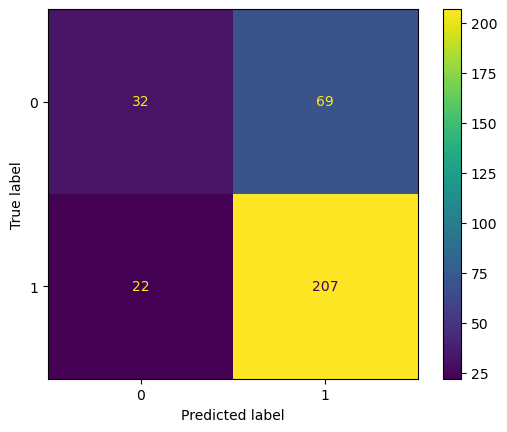

In [103]:
#Sprawdzam metryki predykcji i tworze matryce
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.32      0.41       101
           1       0.75      0.90      0.82       229

    accuracy                           0.72       330
   macro avg       0.67      0.61      0.62       330
weighted avg       0.70      0.72      0.70       330



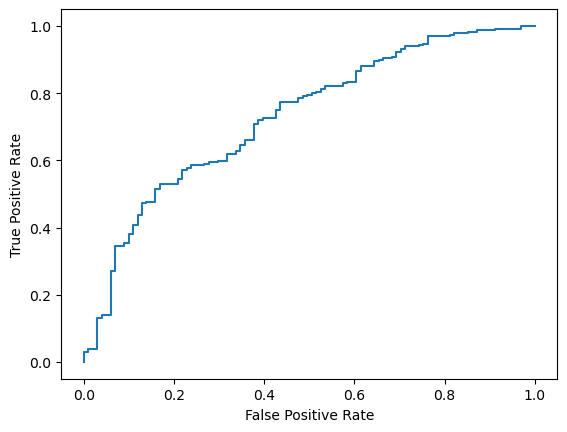

In [107]:
pred_test_proba = model.predict_proba(X_test)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

In [108]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7242424242424242
Precision: 0.75
Recall: 0.9039301310043668


In [110]:
#Drzewo decyzjne

In [137]:
drzewo = DecisionTreeClassifier(random_state=42, criterion='gini')
drzewo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

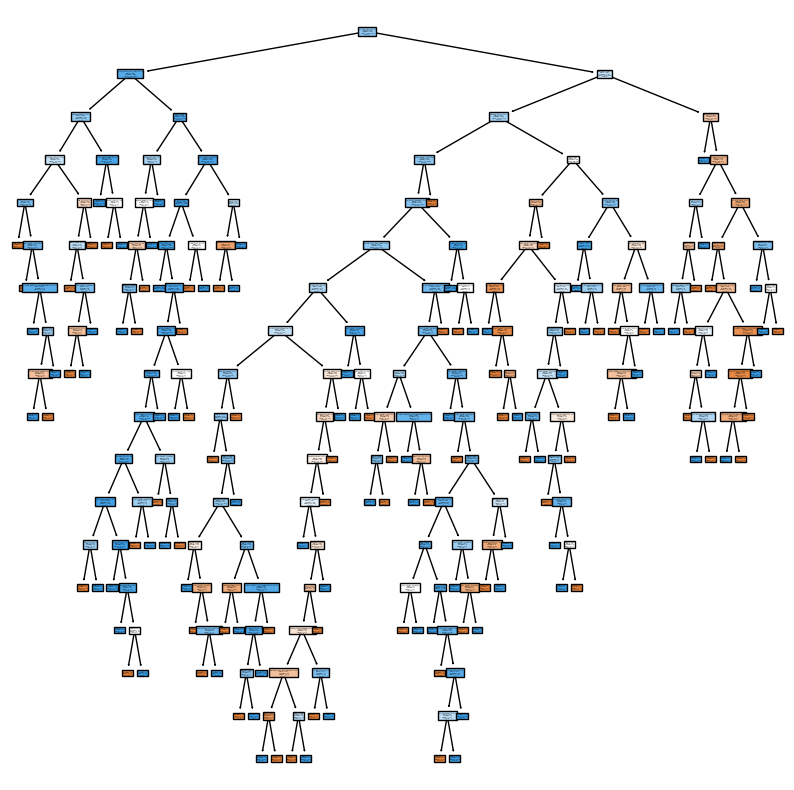

In [131]:
plt.figure(figsize = (10, 10)) #rysuje wykres

plot_tree(drzewo,
          feature_names = drzewo.feature_names_in_,
          class_names = "class",
          filled=True);

In [138]:
#Przyciecie dzrewa
drzewo = DecisionTreeClassifier(max_depth=4, random_state=99)
drzewo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=99)

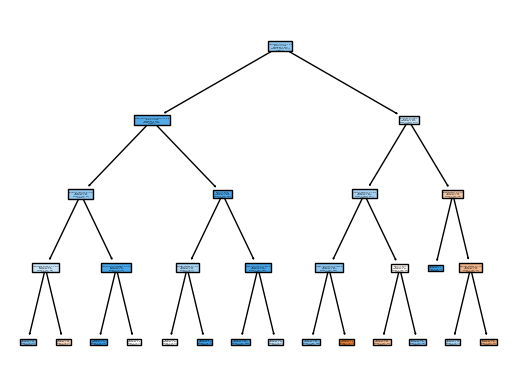

In [139]:
plot_tree(drzewo,
          feature_names = drzewo.feature_names_in_,
          class_names = "class",
          filled=True);

In [132]:
drzewo.feature_importances_

array([0.11711539, 0.10920587, 0.05566638, 0.1465929 , 0.05547116,
       0.04862162, 0.0437539 , 0.15367014, 0.01083777, 0.01551414,
       0.00918055, 0.00575265, 0.        , 0.00718018, 0.00372306,
       0.02829969, 0.        , 0.02293988, 0.00264251, 0.        ,
       0.01107982, 0.        , 0.00435704, 0.00895567, 0.        ,
       0.01542107, 0.01551127, 0.01000758, 0.        , 0.01930032,
       0.00445221, 0.00782906, 0.01027775, 0.00697043, 0.00856639,
       0.        , 0.0168922 , 0.0242114 , 0.        ])

In [133]:
y_drzewo_pred = drzewo.predict(X_test)
y_drzewo_y_drzewo_predpred_proba = drzewo.predict_proba(X_test)
y_fit_drzewo_train = drzewo.predict(X_train)

In [134]:
cm_drzewo = confusion_matrix(y_test, y_drzewo_pred)
cm_drzewo_display = ConfusionMatrixDisplay(cm_drzewo).plot()
print(cm_drzewo)

[[ 49  52]
 [ 49 180]]


In [135]:
print(classification_report(y_test, y_drzewo_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       101
           1       0.78      0.79      0.78       229

    accuracy                           0.69       330
   macro avg       0.64      0.64      0.64       330
weighted avg       0.69      0.69      0.69       330



In [ ]:
score dla regresji 0.82  a dla dzrewa 0,78. Wybrałąbym regresje